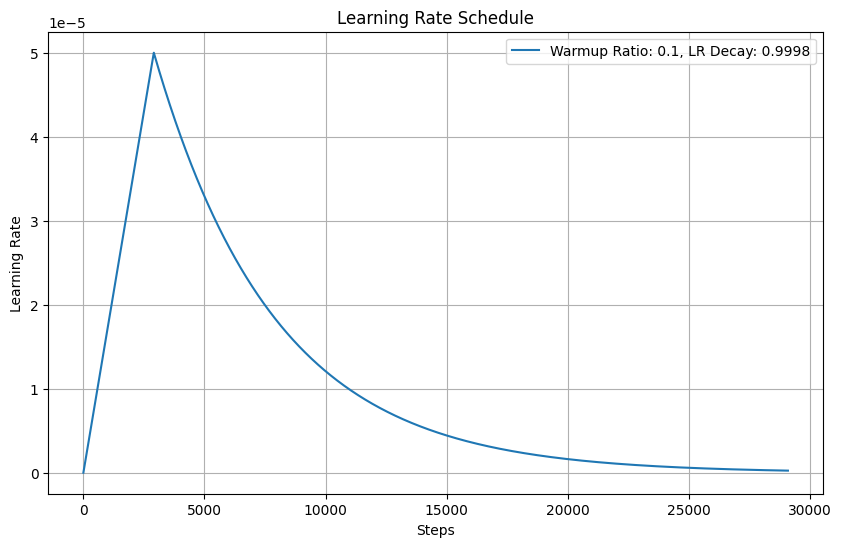

In [5]:
import matplotlib.pyplot as plt
import torch

# WarmupConstantSchedule 클래스 정의
class WarmupConstantSchedule(torch.optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, warmup_ratio, total_steps, lr_decay, last_epoch=-1):
        def lr_lambda(step):
            warmup_steps = int(total_steps * warmup_ratio)
            if step < warmup_steps:
                return float(step) / float(max(1.0, warmup_steps))
            return lr_decay ** (step - warmup_steps)
        super(WarmupConstantSchedule, self).__init__(optimizer, lr_lambda, last_epoch=last_epoch)

# WarmupConstantSchedule에서 스케줄러 경향을 확인할 수 있는 코드 작성
def plot_lr_schedule(warmup_ratio, total_steps, lr_decay, initial_lr):
    optimizer = torch.optim.AdamW([torch.nn.Parameter(torch.randn(2, 2))], lr=initial_lr)
    scheduler = WarmupConstantSchedule(optimizer, warmup_ratio, total_steps, lr_decay)

    lr_values = []
    steps = list(range(total_steps))

    # 각 step에 따른 learning rate 저장
    for step in steps:
        optimizer.step()  # Optimizer 업데이트 (필수는 아님)
        scheduler.step()  # 스케줄러 업데이트
        lr_values.append(optimizer.param_groups[0]['lr'])

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(steps, lr_values, label=f"Warmup Ratio: {warmup_ratio}, LR Decay: {lr_decay}")
    plt.title("Learning Rate Schedule")
    plt.xlabel("Steps")
    plt.ylabel("Learning Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 파라미터 설정 및 스케줄러 경향 확인
warmup_ratio = 0.1
total_steps = 29100
lr_decay = 0.9998
initial_lr = 5e-5

plot_lr_schedule(warmup_ratio, total_steps, lr_decay, initial_lr)
